# Iris

## Boilerplate

In [1]:
%matplotlib inline

In [2]:
# You almost certainly need to run
# conda install scikit-learn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

mpl.style.use('fivethirtyeight')

## Read the data

In [3]:
# Let's import the pandas library
import pandas as pd

# Let's set up a URL to the file, which in this case is hosted on Github
base_url = 'https://raw.githubusercontent.com/johnjfox/Analytic_Enterprise/master/data/'
data_url = 'iris/iris.data.csv'
url = base_url + data_url

# Now let's read the file
iris_df = pd.read_csv(url)

# Finally, let's print the first few lines
iris_df.head(5)

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


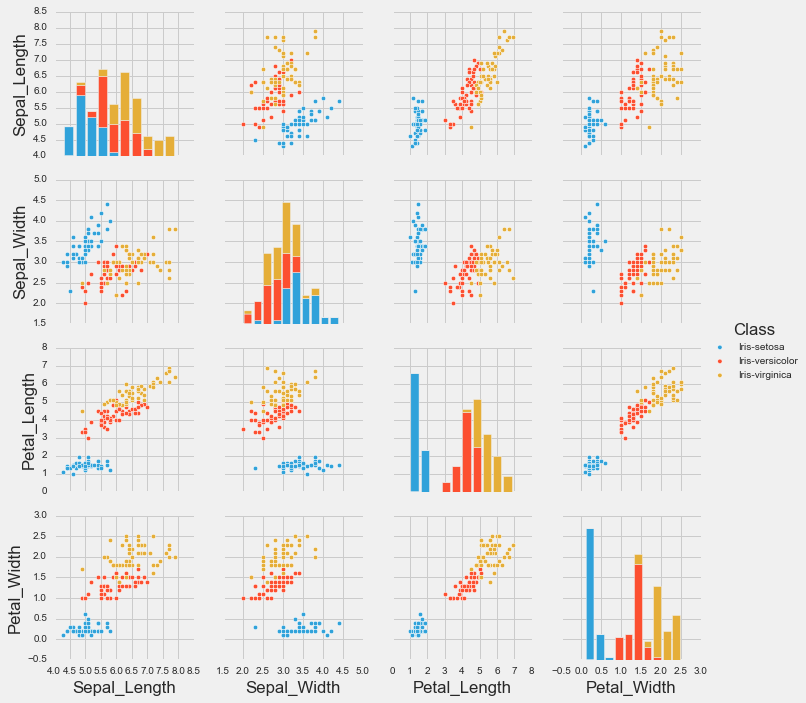

In [4]:
sns.pairplot(iris_df.iloc[:,1:], hue='Class')

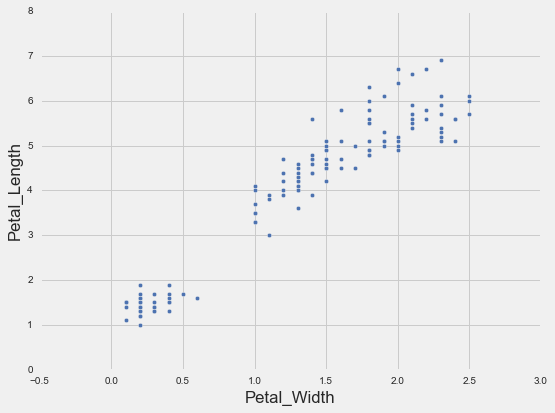

In [5]:
iris_df.plot.scatter('Petal_Width', 'Petal_Length', figsize=(8,6))

In [6]:
iris_no_id_df = iris_df.iloc[:,1:]
iris_no_id_df.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116b712d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1179a1ad0>]], dtype=object)

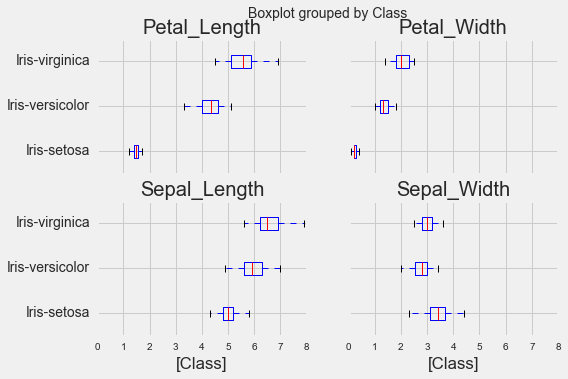

In [7]:
iris_no_id_df.boxplot(vert =False, by='Class')

### NOTE: CORRECTION

This is a correction relative to what I showed in class! Thanks to a helpful quality control editor :) a mistake was corrected and this is now producing a more interesting result. Specifically, I was fitting my model using the original dataset which still had the embedded ID. In effect, I was "learning" that the ID gave me a perfect way to tell which iris was which (which, errr... isn't very helpful in general). I've corrected and now you see a more interesting set of results, in the sense that the classification is far from perfect.

In [8]:
# let's map all of the strings in the 'Class' variable into
# an encoded label

model = KMeans( n_clusters = 3 ) #Set the model to have 3 clusters

model = model.fit( iris_no_id_df.iloc[:,0:4] )

# We can print out the cluster for each instance
print model.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
iris_df['kmeans_class'] = model.labels_
iris_df.sample(5)

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class,kmeans_class
81,82,5.5,2.4,3.7,1.0,Iris-versicolor,0
49,50,5.0,3.3,1.4,0.2,Iris-setosa,1
124,125,6.7,3.3,5.7,2.1,Iris-virginica,2
64,65,5.6,2.9,3.6,1.3,Iris-versicolor,0
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,0


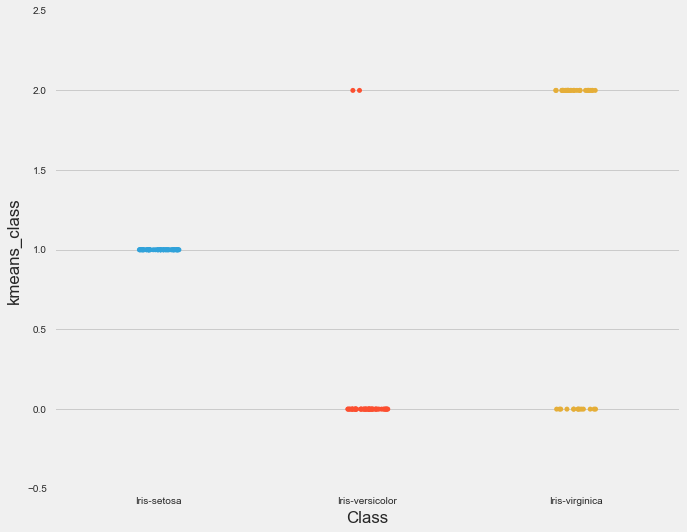

In [10]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Class', y='kmeans_class', data=iris_df, jitter= True)

In [11]:
pd.pivot_table(iris_df, index='Class', columns = 'kmeans_class', values ='ID', aggfunc = 'count')

kmeans_class,0,1,2
Class,,,
Iris-setosa,NaN,50,NaN
Iris-versicolor,48,NaN,2
Iris-virginica,14,NaN,36
